In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# module for performing test train split
from sklearn.model_selection import train_test_split
# Module for feture scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Reading and Understanding the data

In [4]:
#Reading data from CSV file
car = pd.read_csv("CarPrice_Assignment.csv")
pd.set_option('display.max.column',None)
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
#concise summary of dataframe named as car
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#some basic statistical details like percentile, mean, median, etc of dataframe
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Cleaning and visulazing the data

In [7]:
#checking if their is any null value present in the dataframe
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# given in problem that we have to split car company name and car model
car['CarName']=car['CarName'].str.split(expand=True)
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
#Checking the count of Company Name
car['CarName'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: CarName, dtype: int64

##### In upper cell we find that some Car Company name is misspelled like for mazda it's maxda so we can rename those rows from dataset and nissan is written as Nissan so we can write Nissan in lower case


In [10]:
# converting the data into lower case
car['CarName'].replace('Nissan','nissan',inplace=True)
car['CarName'].replace('vw','volkswagen',inplace=True)
car['CarName'].replace('vokswagen','volkswagen',inplace=True)
car['CarName'].replace('maxda','mazda',inplace=True)
car['CarName'].replace('toyouta','toyota',inplace=True)
car['CarName'].replace('porcshce','porsche',inplace=True)

In [11]:
car['CarName'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

In [12]:
# checking for duplicate data
dup = car[car.duplicated()]
dup

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


##### There are no duplicate data present in the dataframe

In [13]:
# droping column car_ID as it is of no use
car=car.drop('car_ID',axis=1)

In [14]:
#checking the shape of the dataset after cleaning data
car.shape

(205, 25)

In [15]:
# final dataset on which we have to build model
car

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0




## Visualization


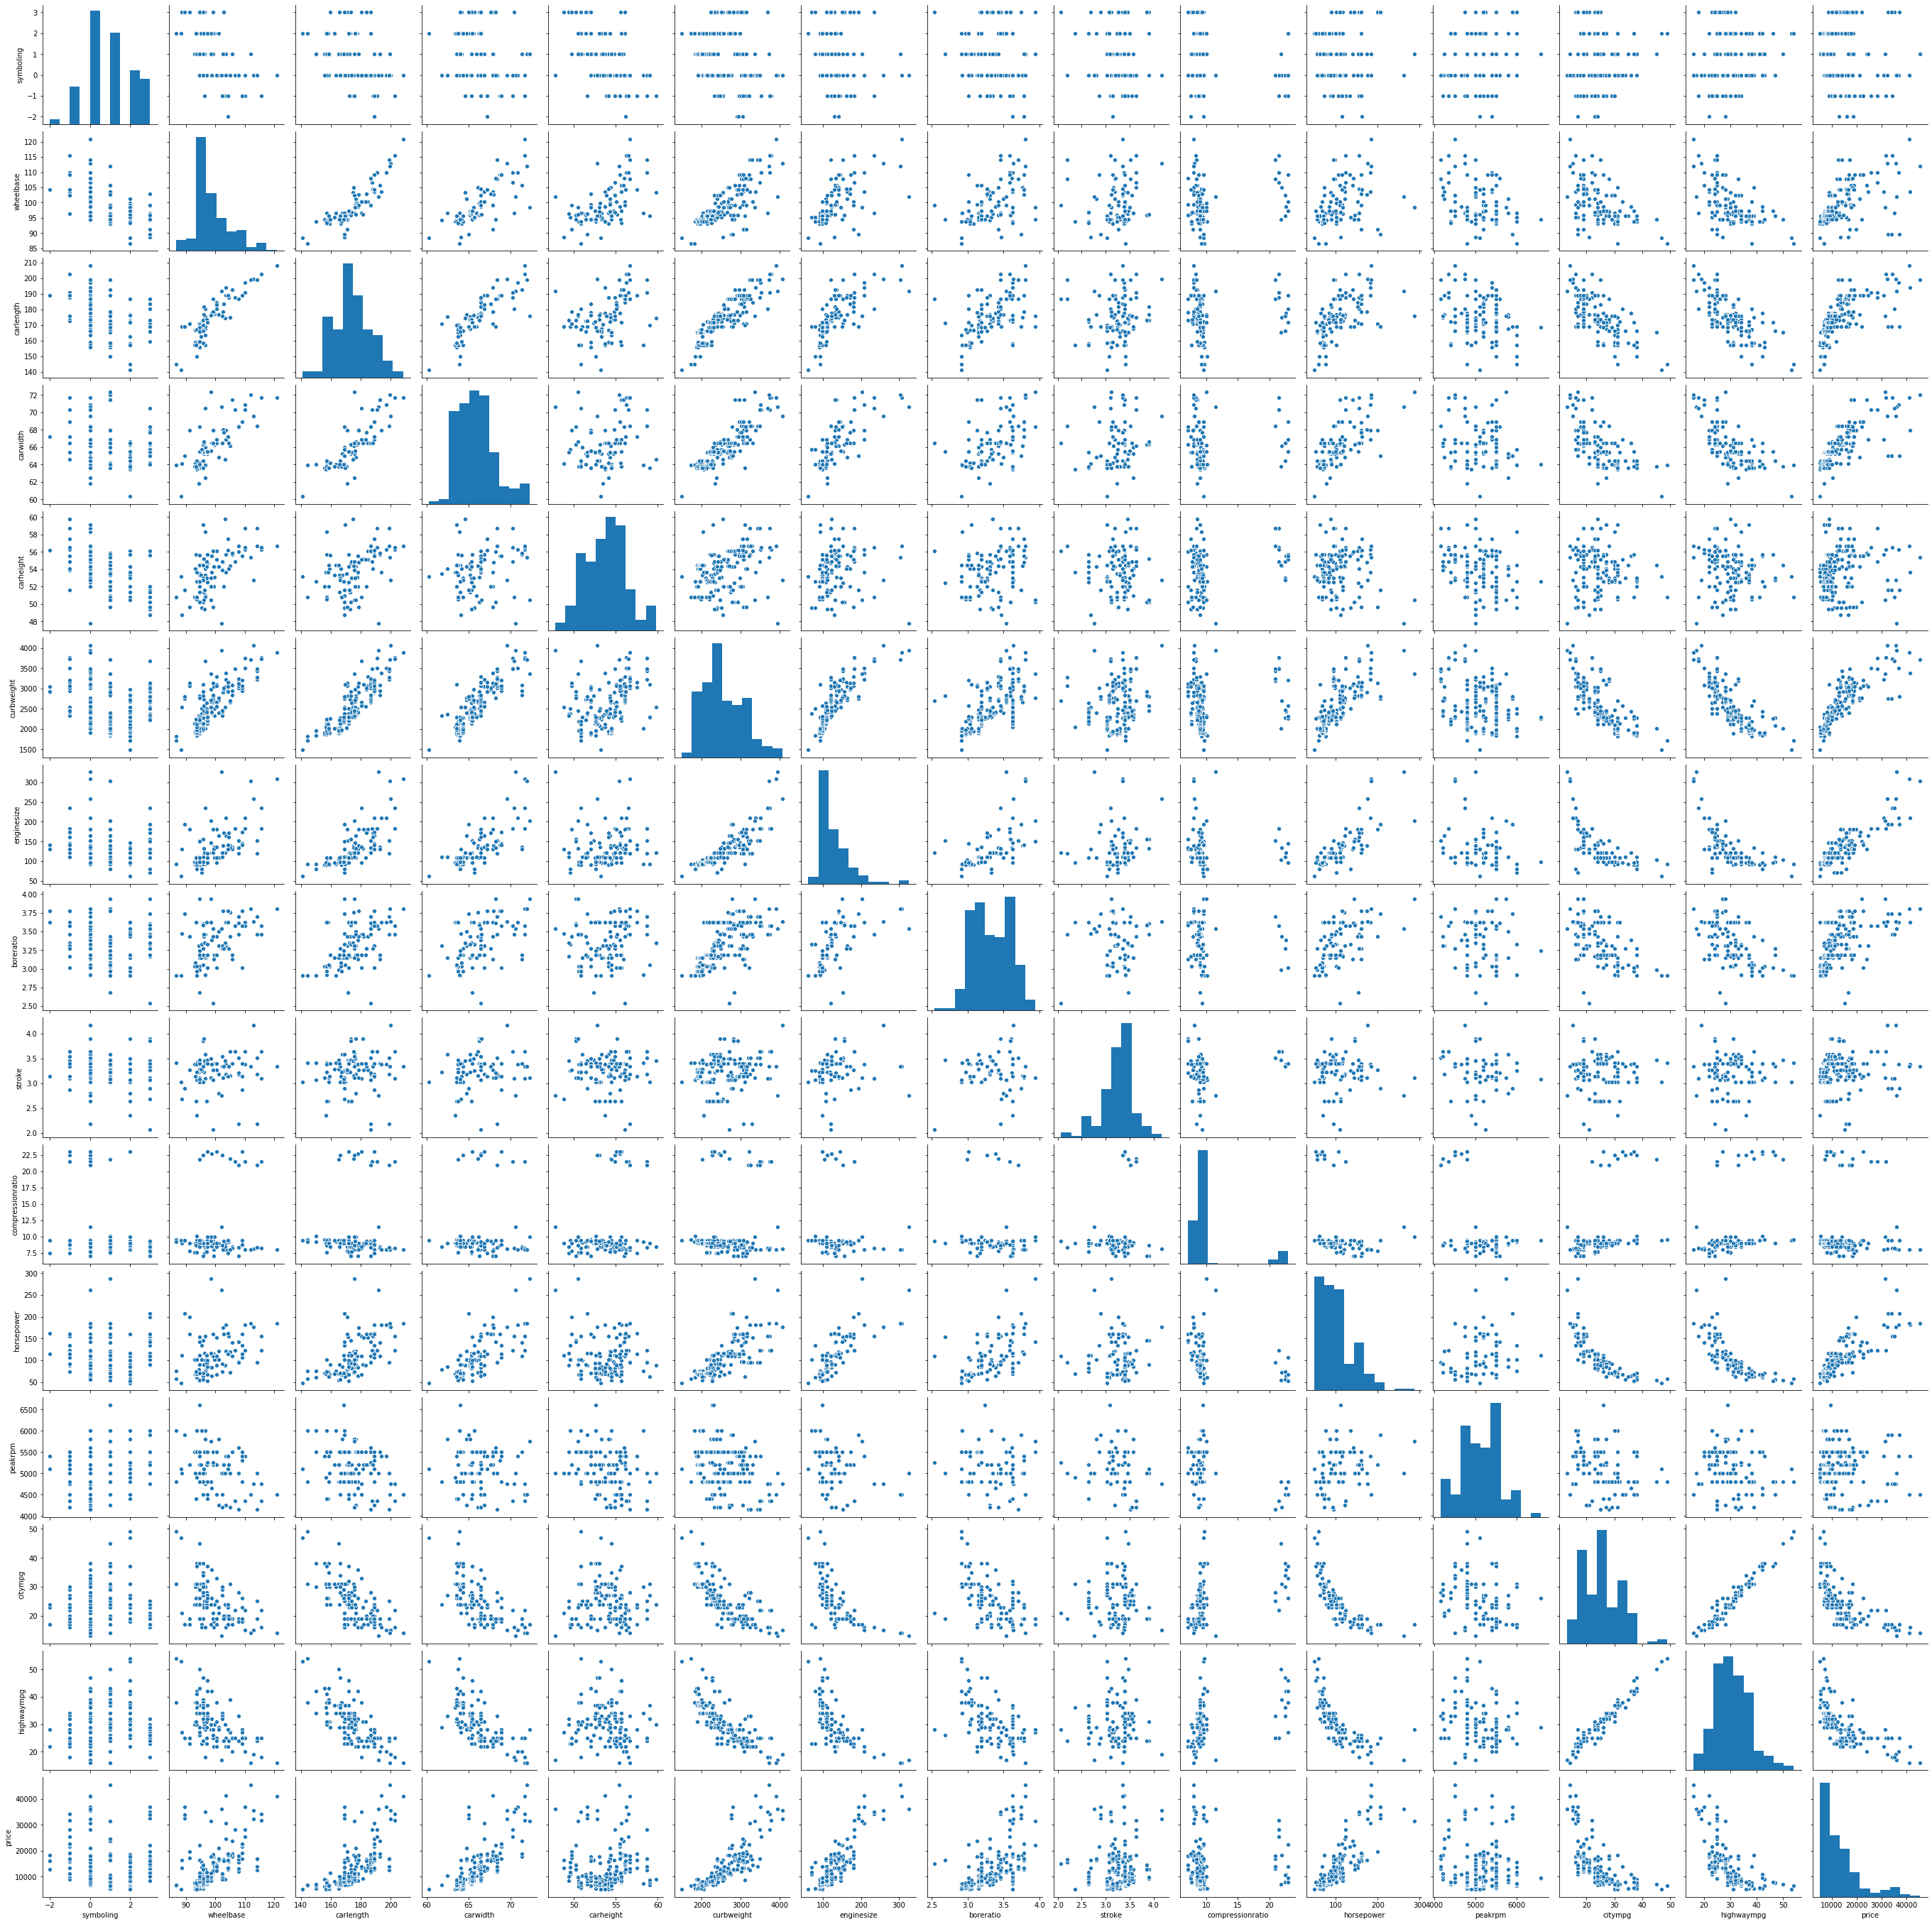

In [16]:
sns.pairplot(car)
plt.show()

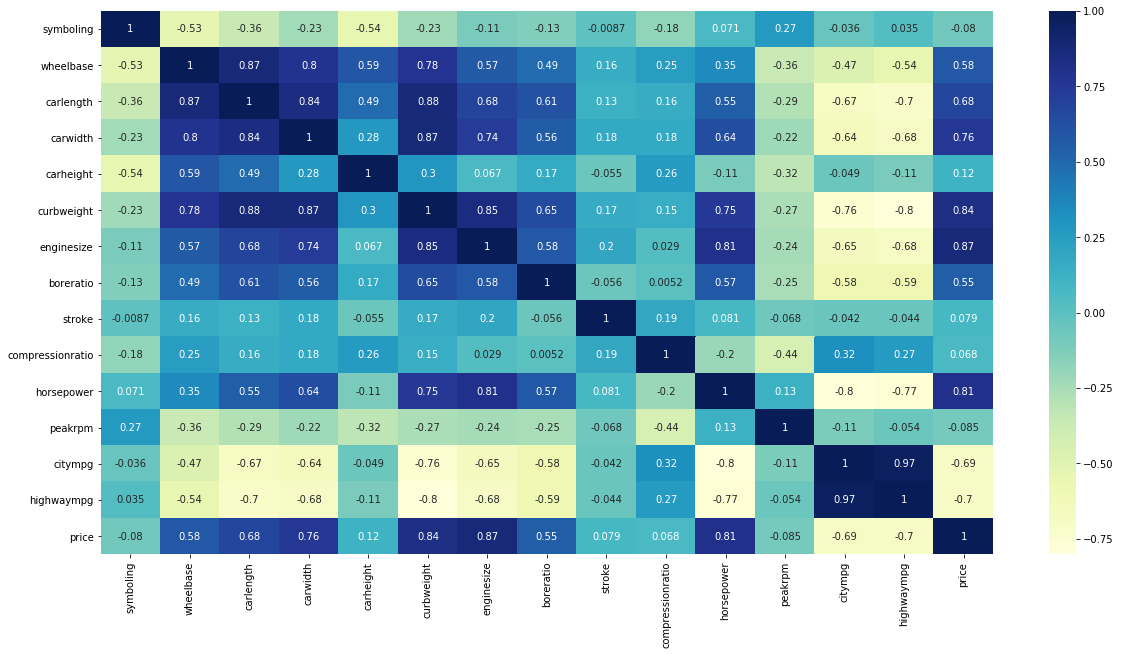

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(car.corr(), annot = True, cmap="YlGnBu")
plt.show()


##### from above scatter plot and heat map we clearly see that columns like ' citympg', 'highwaympg', 'peakrpm', 'symboling' are negatively corelated and 'car height', 'stroke', 'compressionratio', 'peakrpm', 'symboling' doesn't show any trend with 'price'. So we are not requiring these columns

In [18]:
car1 = car[['price','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','horsepower']]

In [19]:
car1.head()

,price,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower
0,13495.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111
1,16500.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111
2,16500.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154
3,13950.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102
4,17450.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115


In [20]:
car1.shape

(205, 18)

##### We have ploted the scatter plot for all numerical columns

##### Now we have making box plot for non categorial variables

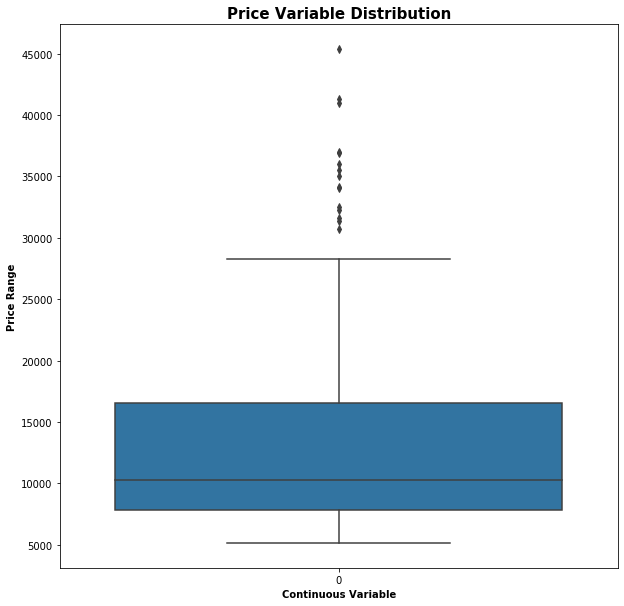

In [21]:
# Outlier Analysis of target variable
plt.figure(figsize = [10,10])
sns.boxplot(data=car1['price'])
plt.title("Price Variable Distribution", fontsize = 15, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
plt.show()

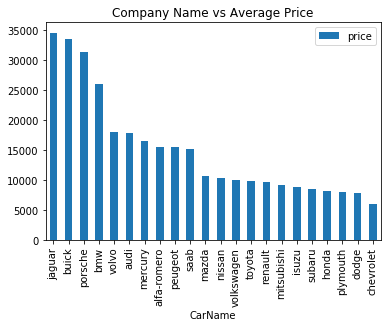

In [22]:
#company name vs average price in market
df = pd.DataFrame(car1.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

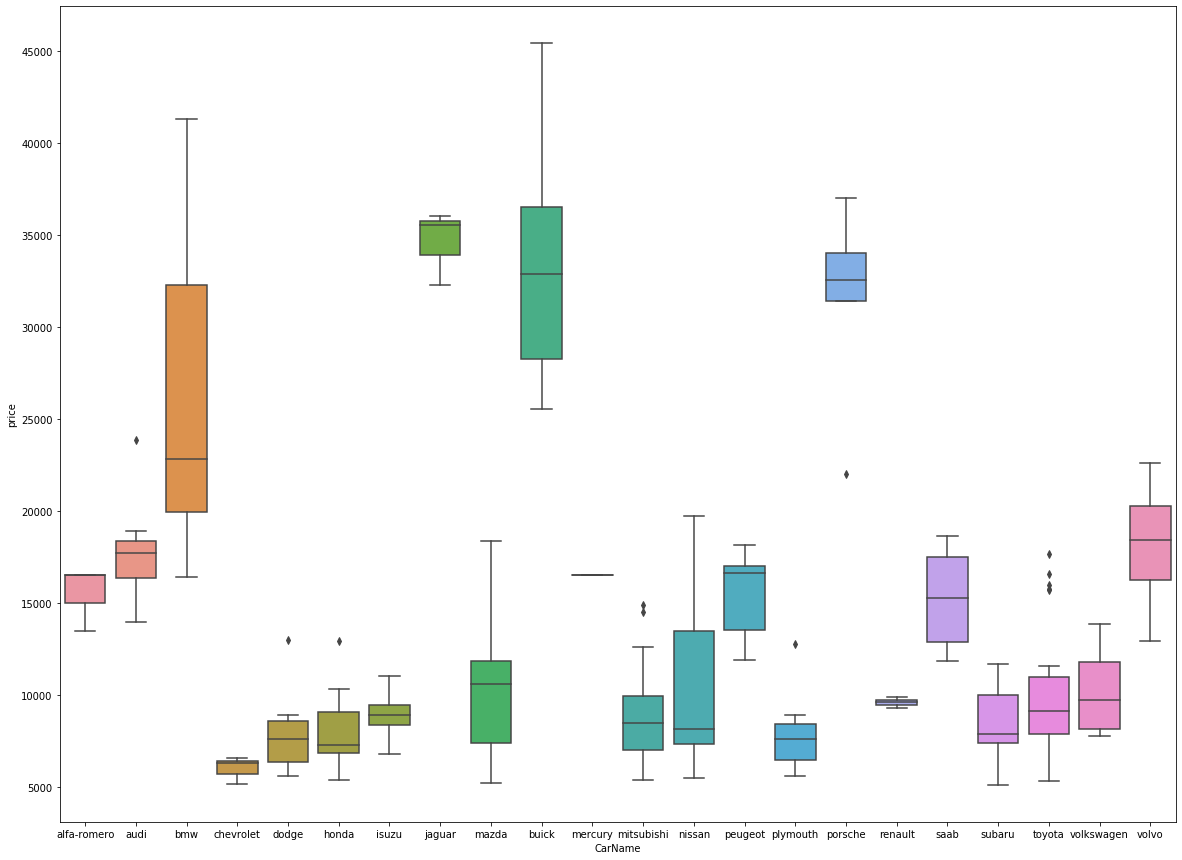

Average Car Price In US:  13276.710570731706
CarName
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [23]:
plt.figure(figsize=(20,15))
sns.boxplot(x = car1['CarName'], y = 'price', data = car1)
plt.show()
print('Average Car Price In US: ',car1['price'].mean())
print(car1.groupby('CarName').price.mean().sort_values(ascending=False).head())

##### We can clearly see that car manufacturers like jaguar, Buick, Porsche, BMW, Volo are above the average price of other US car manufacturer

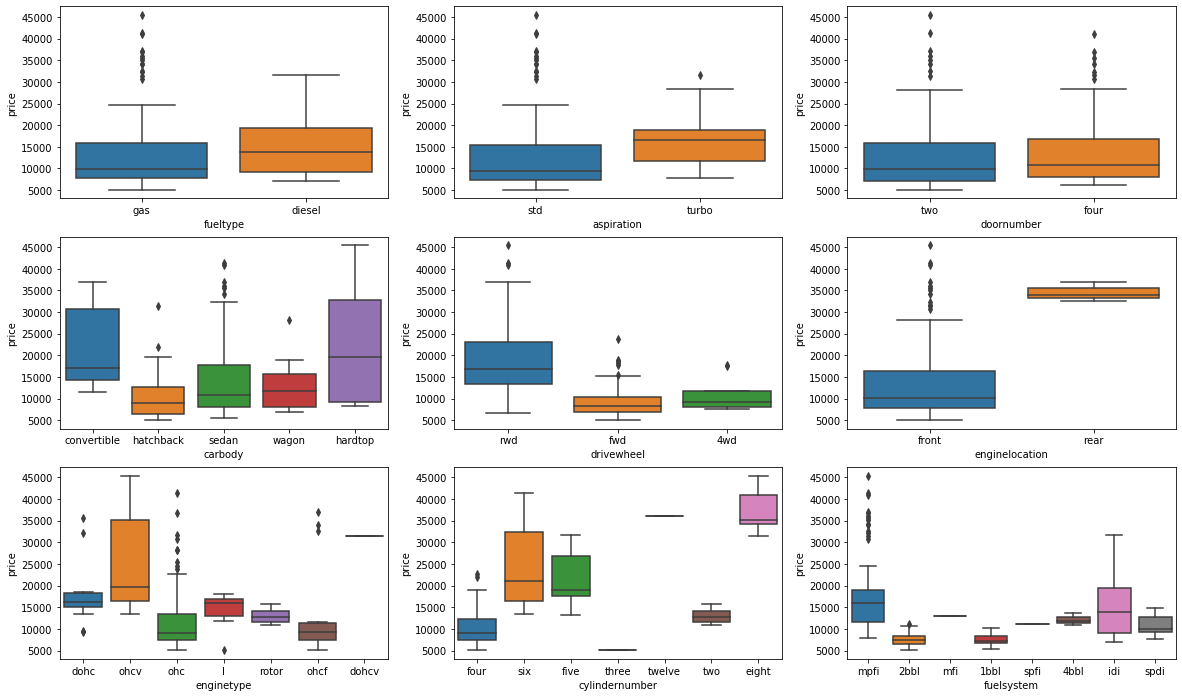

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car1)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car1)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car1)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car1)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car1)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car1)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car1)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car1)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car1)
plt.show()

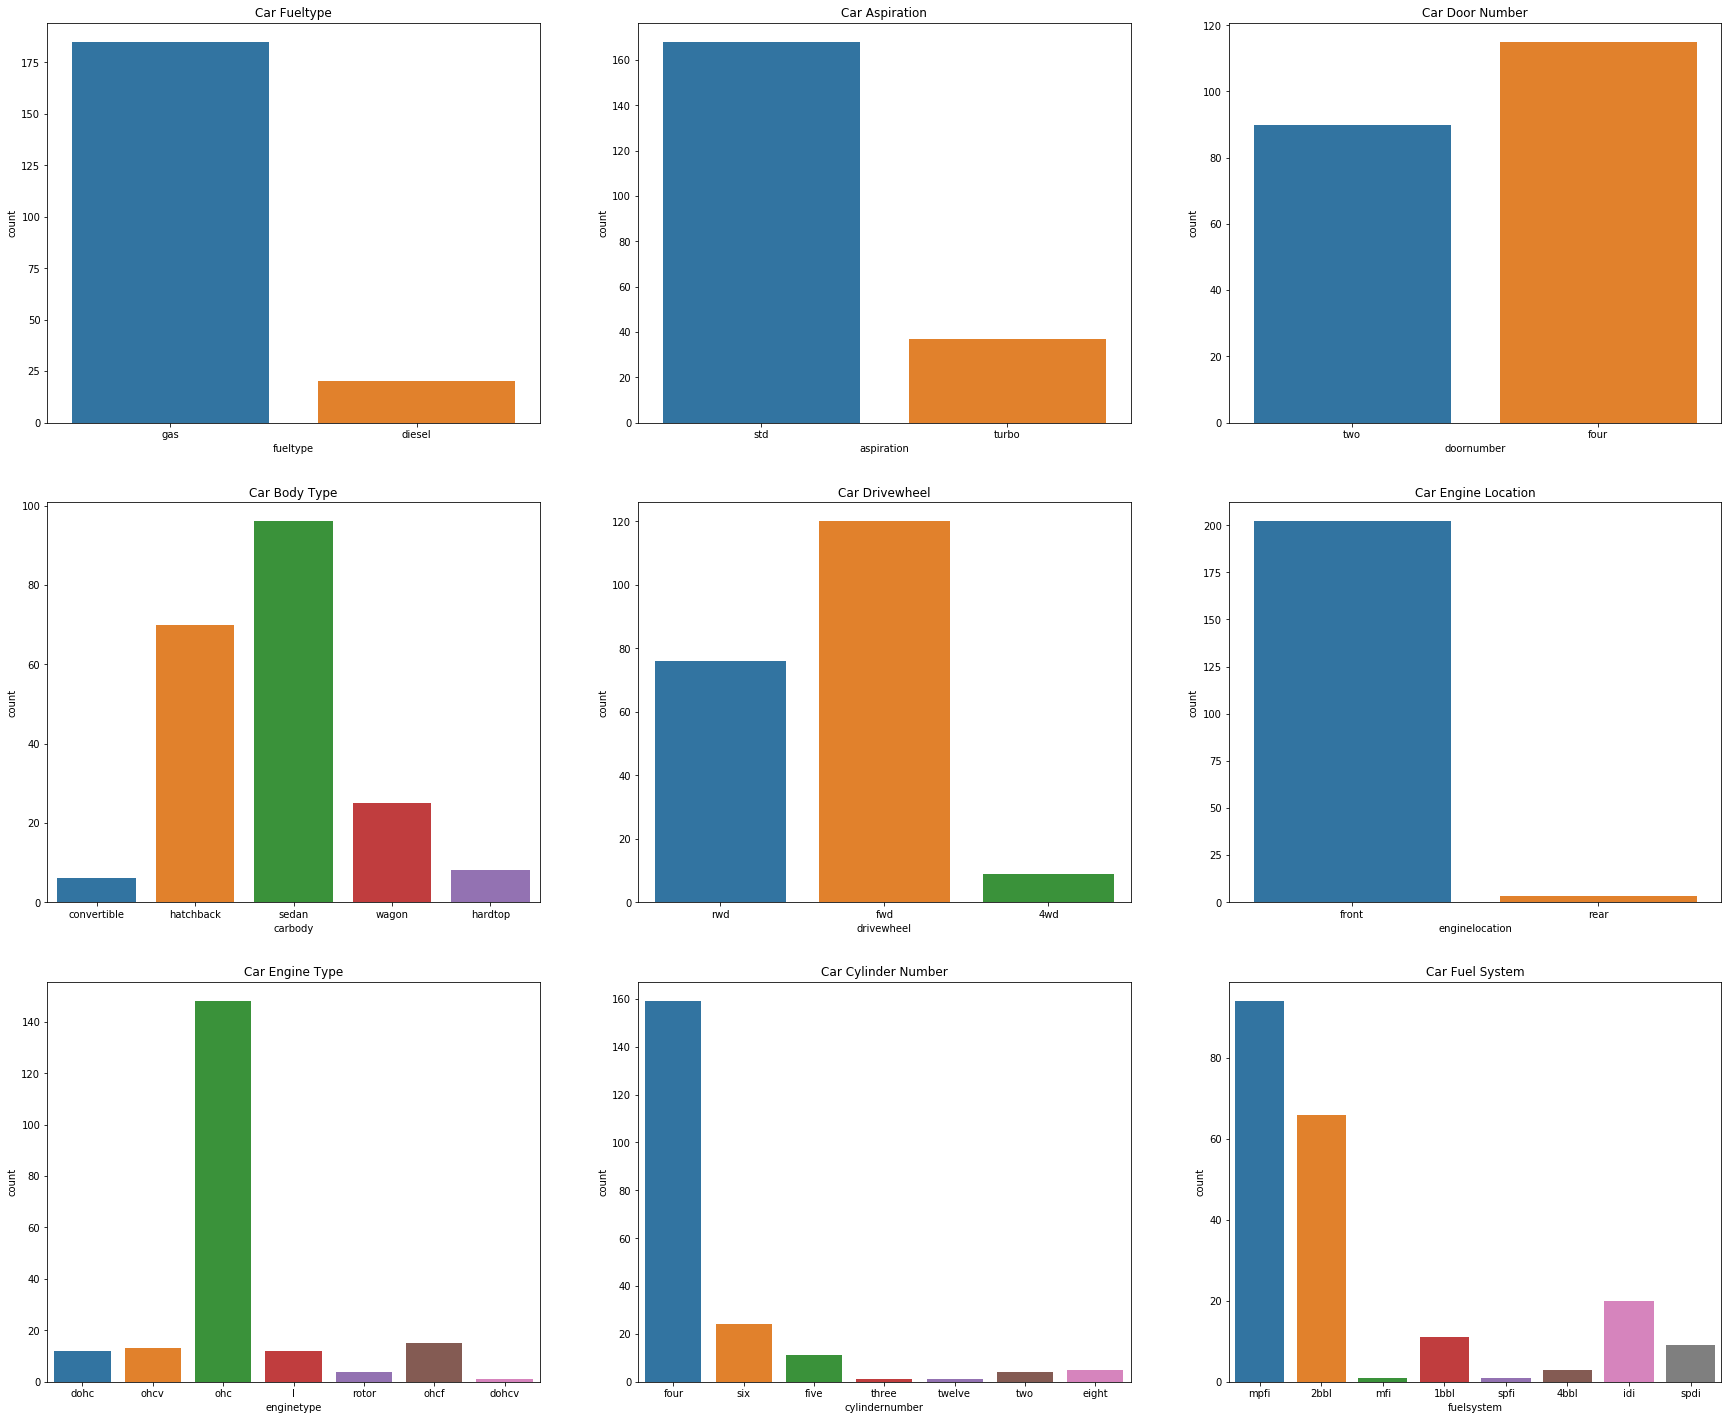

In [25]:
plt.figure(figsize=(30,25))

plt.subplot(3,3,1)
plt.title('Car Fueltype')
sns.countplot(car1.fueltype)

plt.subplot(3,3,2)
plt.title('Car Aspiration')
sns.countplot(car1.aspiration)

plt.subplot(3,3,3)
plt.title('Car Door Number')
sns.countplot(car1.doornumber)

plt.subplot(3,3,4)
plt.title('Car Body Type')
sns.countplot(car1.carbody)

plt.subplot(3,3,5)
plt.title('Car Drivewheel')
sns.countplot(car1.drivewheel)


plt.subplot(3,3,6)
plt.title('Car Engine Location')
sns.countplot(car1.enginelocation)

plt.subplot(3,3,7)
plt.title('Car Engine Type')
sns.countplot(car1.enginetype)

plt.subplot(3,3,8)
plt.title('Car Cylinder Number')
sns.countplot(car1.cylindernumber)

plt.subplot(3,3,9)
plt.title('Car Fuel System')
sns.countplot(car1.fuelsystem)

plt.show()


##### 1. Customer prefer more cars which runs on Gas rather than Diesel 
##### 2. Customer prefer std combustion engine because of low price
##### 3. As in terms of car doors it totally depends on customer as they like 2 or 4 doors as their are almost same price. So we can ignore this.
##### 4. Most customer buys hatchback or sedan as they are low in cost and perfect family car where as wagon is also low in cost but wagon is used for carrying goods as wagon have large bootspace
##### 5. There are very less buyer who goes for 4wd because it increses the fuel consumption and usually 4wd is used it can not be used in all conditions
##### 6. Approx. 98% customer opt for front engine location because of very low price as compared to rear location engine. As most of the buyer go for the particuar type. So we can also ignore this column
##### 7. As you can see that most of the car having ohc engine type may be due to it's low price
##### 8. A 3-cylinder engine is better suited for fuel efficiency and cost savings and 4 cylinder engine is better suited for refinement and punchy power delivery. So this shows that customer prefer more power over cost savings.
##### 9. MPFI means Multi Point Fuel Injection, It delivers an exact quantity of fuel in each cylinder at the right time which helps a car to deliver more power in less fuel consumption that's why more buyer go for mpfi fuel system.

##### Now we can drop 'enginelocation' and 'doornumber'

In [26]:
car1.drop(['enginelocation','doornumber'],axis=1,inplace=True)
car1.head()

,price,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower
0,13495.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111
1,16500.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111
2,16500.0,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154
3,13950.0,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102
4,17450.0,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115


##### now converting columns in dummy variable

In [27]:
# Get the dummy variables for the feature 'fuel_type' and store it in a new variable 'fuel_type1' and also delete the column symboling as it is of no use now
# we have to follow these steps to convert all string datatype columns to int datatype 
fuel_type1 = pd.get_dummies(car1['fueltype'], drop_first = True)
car1 = pd.concat([car1, fuel_type1], axis = 1)
car1.drop(['fueltype'], axis = 1, inplace = True)
car1.head()

,price,CarName,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,gas
0,13495.0,alfa-romero,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,1
1,16500.0,alfa-romero,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,1
2,16500.0,alfa-romero,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,1
3,13950.0,audi,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,1
4,17450.0,audi,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,1


In [28]:
aspiration1 = pd.get_dummies(car1['aspiration'], drop_first = True)
car1 = pd.concat([car1, aspiration1], axis = 1)
car1.drop(['aspiration'], axis = 1, inplace = True)
car1.head()

,price,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,gas,turbo
0,13495.0,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,1,0
1,16500.0,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,1,0
2,16500.0,alfa-romero,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,1,0
3,13950.0,audi,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,1,0
4,17450.0,audi,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,1,0


In [29]:
cylindernumber1 = pd.get_dummies(car1['cylindernumber'], drop_first = True)
car1 = pd.concat([car1, cylindernumber1], axis = 1)
car1.drop(['cylindernumber'], axis = 1, inplace = True)
car1.head()

,price,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two
0,13495.0,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,1,0,0,1,0,0,0,0
1,16500.0,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,1,0,0,1,0,0,0,0
2,16500.0,alfa-romero,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,1,0,0,0,1,0,0,0
3,13950.0,audi,sedan,fwd,99.8,176.6,66.2,2337,ohc,109,mpfi,3.19,102,1,0,0,1,0,0,0,0
4,17450.0,audi,sedan,4wd,99.4,176.6,66.4,2824,ohc,136,mpfi,3.19,115,1,0,1,0,0,0,0,0


In [30]:
carbody1 = pd.get_dummies(car1['carbody'], drop_first = True)
car1 = pd.concat([car1, carbody1], axis = 1)
car1.drop(['carbody'], axis = 1, inplace = True)
car1.head()

,price,CarName,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon
0,13495.0,alfa-romero,rwd,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0
1,16500.0,alfa-romero,rwd,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0
2,16500.0,alfa-romero,rwd,94.5,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,1,0,0,0,1,0,0,0,0,1,0,0
3,13950.0,audi,fwd,99.8,176.6,66.2,2337,ohc,109,mpfi,3.19,102,1,0,0,1,0,0,0,0,0,0,1,0
4,17450.0,audi,4wd,99.4,176.6,66.4,2824,ohc,136,mpfi,3.19,115,1,0,1,0,0,0,0,0,0,0,1,0


In [31]:
drivewheel1 = pd.get_dummies(car1['drivewheel'], drop_first = True)
car1 = pd.concat([car1, drivewheel1], axis = 1)
car1.drop(['drivewheel'], axis = 1, inplace = True)
car1.head()

,price,CarName,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd
0,13495.0,alfa-romero,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,16500.0,alfa-romero,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,16500.0,alfa-romero,94.5,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,1,0,0,0,1,0,0,0,0,1,0,0,0,1
3,13950.0,audi,99.8,176.6,66.2,2337,ohc,109,mpfi,3.19,102,1,0,0,1,0,0,0,0,0,0,1,0,1,0
4,17450.0,audi,99.4,176.6,66.4,2824,ohc,136,mpfi,3.19,115,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [32]:
enginetype1 = pd.get_dummies(car1['enginetype'], drop_first = True)
car1 = pd.concat([car1, enginetype1], axis = 1)
car1.drop(['enginetype'], axis = 1, inplace = True)
car1.head()

,price,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,13495.0,alfa-romero,88.6,168.8,64.1,2548,130,mpfi,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16500.0,alfa-romero,88.6,168.8,64.1,2548,130,mpfi,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,16500.0,alfa-romero,94.5,171.2,65.5,2823,152,mpfi,2.68,154,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,13950.0,audi,99.8,176.6,66.2,2337,109,mpfi,3.19,102,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,17450.0,audi,99.4,176.6,66.4,2824,136,mpfi,3.19,115,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [33]:
fuelsystem1 = pd.get_dummies(car1['fuelsystem'], drop_first = True)
car1 = pd.concat([car1, fuelsystem1], axis = 1)
car1.drop(['fuelsystem'], axis = 1, inplace = True)
car1.head()

,price,CarName,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,13495.0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,alfa-romero,88.6,168.8,64.1,2548,130,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,alfa-romero,94.5,171.2,65.5,2823,152,2.68,154,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,13950.0,audi,99.8,176.6,66.2,2337,109,3.19,102,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,17450.0,audi,99.4,176.6,66.4,2824,136,3.19,115,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
# we can drop column CarName as it is of no use now
car1.drop('CarName',axis=1,inplace=True)

In [35]:
car1.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [36]:
car1.shape

(205, 35)

## Now Splitting the Data into Training and Testing Sets


In [37]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
car_train, car_test = train_test_split(car1, train_size = 0.7,test_size = 0.3, random_state = 100)

## Rescaling the data


In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = ['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower']
car_train[x] = scaler.fit_transform(car_train[x])

In [39]:
car_train.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.068818,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
166,0.122110,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.314446,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
199,0.382131,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [40]:
car_train.describe()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.219310,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.909091,0.181818,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.215682,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.288490,0.387050,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.067298,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.140343,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.313479,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


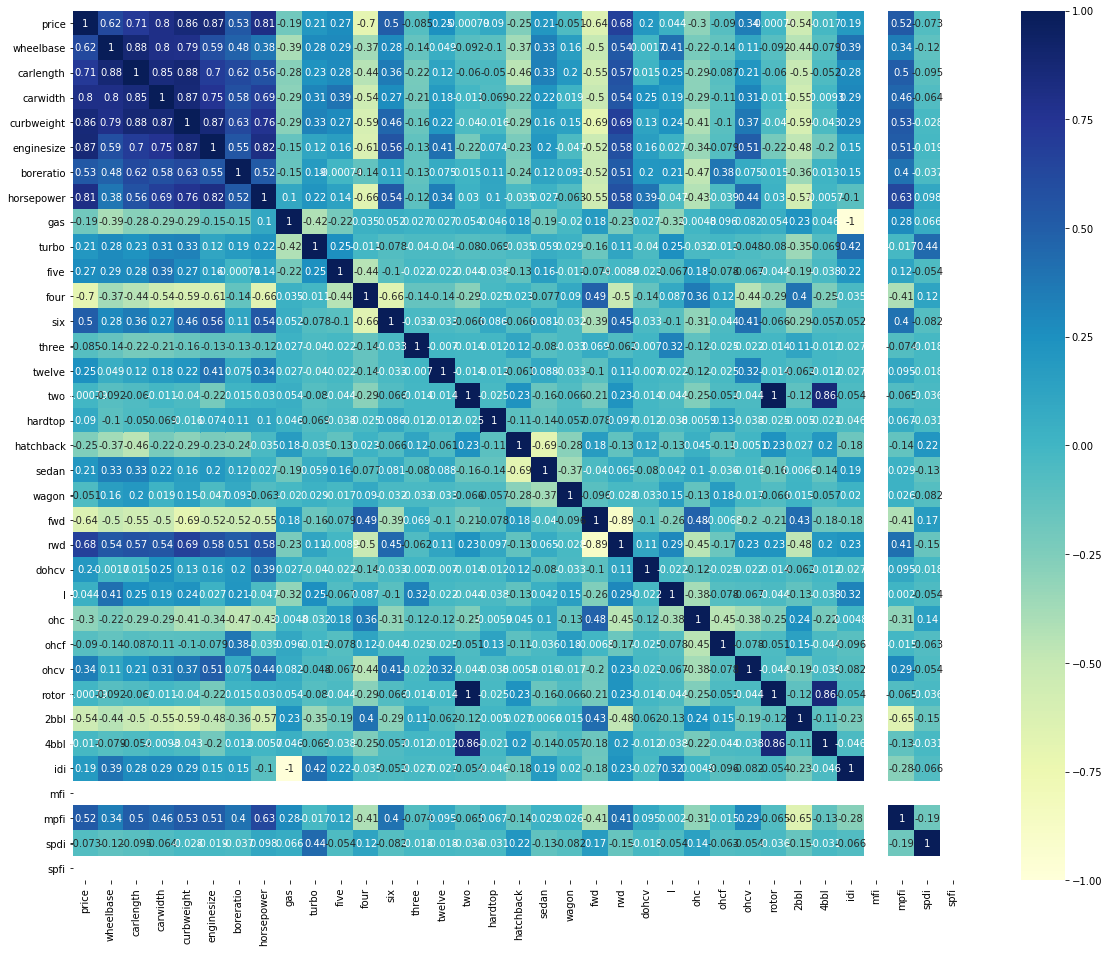

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 16))
sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### from above heat map we can conclude that 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',  'housepower' are highly correlated with 'price'

### Dividing into X and Y sets for the model building

In [42]:
y_train = car_train.pop('price')
X_train = car_train

### Building our model
We will be using a mix approach. Initially using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model

### RFE
#### Recursive feature elimination
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = LinearRegression()
# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 25)

rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True False False False False False  True False]
[ 1  1  1  1  1  1  1  1  6  1  1  1  4  1  1  1  1  1  1  8  1  1  1  1
  1  1  1  5  3  2  9  7  1 10]


In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('gas', True, 1),
 ('turbo', False, 6),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 4),
 ('twelve', True, 1),
 ('two', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 8),
 ('rwd', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('2bbl', False, 5),
 ('4bbl', False, 3),
 ('idi', False, 2),
 ('mfi', False, 9),
 ('mpfi', False, 7),
 ('spdi', True, 1),
 ('spfi', False, 10)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'gas', 'five', 'four', 'six', 'twelve',
       'two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'spdi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     56.84
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.27e-53
Time:                        22:26:57   Log-Likelihood:                 197.88
No. Observations:                 143   AIC:                            -345.8
Df Residuals:                     118   BIC:                            -271.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.078      2.155      0.0

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,two,inf
24,rotor,inf
0,const,192.73
4,curbweight,24.14
5,enginesize,22.09
10,four,18.76
16,sedan,17.64
15,hatchback,14.53
2,carlength,13.88
7,horsepower,13.06


##### Now we have to chech p value of if it is greater than 0.05 then we have to drop our feature

In [50]:
X_train_new = X_train_rfe.drop(["two"], axis = 1)

In [51]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [52]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     56.84
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.27e-53
Time:                        22:26:59   Log-Likelihood:                 197.88
No. Observations:                 143   AIC:                            -345.8
Df Residuals:                     118   BIC:                            -271.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.078      2.155      0.0

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,192.73
4,curbweight,24.14
5,enginesize,22.09
10,four,18.76
15,sedan,17.64
14,hatchback,14.53
2,carlength,13.88
7,horsepower,13.06
3,carwidth,11.35
1,wheelbase,10.24


In [54]:
X_train_new = X_train_new.drop(['rotor'], axis=1)

In [55]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [56]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     59.60
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.96e-54
Time:                        22:27:01   Log-Likelihood:                 197.65
No. Observations:                 143   AIC:                            -347.3
Df Residuals:                     119   BIC:                            -276.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.063      2.212      0.0

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,128.24
4,curbweight,22.99
15,sedan,17.00
14,hatchback,13.98
2,carlength,13.66
7,horsepower,13.01
5,enginesize,12.88
3,carwidth,10.80
1,wheelbase,10.19
16,wagon,9.03


In [58]:
X_train_new = X_train_new.drop(['carlength'], axis=1)


In [59]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [60]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     62.20
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           4.24e-55
Time:                        22:27:03   Log-Likelihood:                 196.98
No. Observations:                 143   AIC:                            -348.0
Df Residuals:                     120   BIC:                            -279.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1383      0.063      2.193      0.0

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,128.21
3,curbweight,20.82
14,sedan,16.79
13,hatchback,13.94
6,horsepower,12.99
4,enginesize,12.34
2,carwidth,9.61
1,wheelbase,8.96
15,wagon,8.85
9,four,7.27


In [62]:
X_train_new = X_train_new.drop(['wheelbase'], axis=1)


In [63]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [64]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     65.26
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           7.46e-56
Time:                        22:27:06   Log-Likelihood:                 196.54
No. Observations:                 143   AIC:                            -349.1
Df Residuals:                     121   BIC:                            -283.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1170      0.058      2.018      0.0

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,108.50
2,curbweight,18.00
13,sedan,13.13
3,enginesize,12.24
12,hatchback,11.69
5,horsepower,10.42
14,wagon,7.27
8,four,7.16
1,carwidth,6.78
9,six,6.35


In [66]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)


In [67]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [68]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     67.75
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           2.63e-56
Time:                        22:27:09   Log-Likelihood:                 195.25
No. Observations:                 143   AIC:                            -348.5
Df Residuals:                     122   BIC:                            -286.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1301      0.058      2.259      0.0

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,106.00
12,sedan,13.11
11,hatchback,11.69
4,horsepower,9.70
2,enginesize,9.14
7,four,7.16
13,wagon,6.75
8,six,6.34
17,ohc,5.49
1,carwidth,5.17


In [70]:
X_train_new = X_train_new.drop(['boreratio'], axis=1)


In [71]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [72]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     69.47
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           2.05e-56
Time:                        22:27:12   Log-Likelihood:                 193.00
No. Observations:                 143   AIC:                            -346.0
Df Residuals:                     123   BIC:                            -286.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1320      0.058      2.266      0.0

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,105.97
11,sedan,12.88
10,hatchback,11.55
3,horsepower,9.15
2,enginesize,7.86
6,four,6.98
12,wagon,6.65
7,six,5.61
16,ohc,5.49
1,carwidth,5.03


In [74]:
X_train_new = X_train_new.drop(['ohcv'], axis=1)


In [75]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [76]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     71.19
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.94e-56
Time:                        22:27:14   Log-Likelihood:                 190.54
No. Observations:                 143   AIC:                            -343.1
Df Residuals:                     124   BIC:                            -286.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1120      0.058      1.924      0.0

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,103.06
11,sedan,12.88
10,hatchback,11.55
3,horsepower,9.09
2,enginesize,7.44
6,four,6.86
12,wagon,6.65
7,six,5.60
1,carwidth,5.01
16,ohc,4.84


In [78]:
X_train_new = X_train_new.drop(['spdi'], axis=1)


In [79]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [80]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     73.26
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.71e-56
Time:                        22:27:15   Log-Likelihood:                 188.16
No. Observations:                 143   AIC:                            -340.3
Df Residuals:                     125   BIC:                            -287.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1140      0.059      1.934      0.0

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,103.03
11,sedan,12.88
10,hatchback,11.49
2,enginesize,7.43
3,horsepower,7.41
6,four,6.86
12,wagon,6.65
7,six,5.41
1,carwidth,4.85
16,ohc,4.68


In [82]:
X_train_new = X_train_new.drop(['gas'], axis=1)


In [83]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [84]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     75.65
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.49e-56
Time:                        22:27:17   Log-Likelihood:                 185.79
No. Observations:                 143   AIC:                            -337.6
Df Residuals:                     126   BIC:                            -287.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0475      0.050      0.953      0.3

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.91
10,sedan,12.83
9,hatchback,11.44
2,enginesize,7.18
5,four,6.80
11,wagon,6.64
3,horsepower,5.96
6,six,5.37
15,ohc,4.68
1,carwidth,4.67


In [86]:
X_train_new = X_train_new.drop(['dohcv'], axis=1)


In [87]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [88]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     78.74
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.02e-56
Time:                        22:27:18   Log-Likelihood:                 183.70
No. Observations:                 143   AIC:                            -335.4
Df Residuals:                     127   BIC:                            -288.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0536      0.050      1.067      0.2

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.62
10,sedan,12.76
9,hatchback,11.38
2,enginesize,7.16
11,wagon,6.60
5,four,6.46
1,carwidth,4.67
3,horsepower,4.67
6,six,4.62
14,ohc,4.62


In [90]:
X_train_new = X_train_new.drop(['twelve'], axis=1)


In [91]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [92]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     82.17
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           7.62e-57
Time:                        22:27:19   Log-Likelihood:                 181.49
No. Observations:                 143   AIC:                            -333.0
Df Residuals:                     128   BIC:                            -288.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0571      0.051      1.123      0.2

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.53
9,sedan,11.98
8,hatchback,10.85
10,wagon,6.24
5,four,6.15
2,enginesize,5.14
3,horsepower,4.62
13,ohc,4.61
1,carwidth,4.00
6,six,3.36


In [94]:
X_train_new = X_train_new.drop(['six'], axis=1)


In [95]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [96]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     85.99
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           6.39e-57
Time:                        22:27:21   Log-Likelihood:                 179.15
No. Observations:                 143   AIC:                            -330.3
Df Residuals:                     129   BIC:                            -288.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.050      0.623      0.5

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.13
8,sedan,11.64
7,hatchback,10.67
9,wagon,6.03
2,enginesize,4.70
3,horsepower,4.62
12,ohc,4.52
1,carwidth,3.80
5,four,3.73
13,ohcf,2.48


In [98]:
X_train_new = X_train_new.drop(['five'], axis=1)


In [99]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [100]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     90.30
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           6.07e-57
Time:                        22:27:22   Log-Likelihood:                 176.66
No. Observations:                 143   AIC:                            -327.3
Df Residuals:                     130   BIC:                            -288.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.050      0.267      0.7

In [101]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.27
7,sedan,11.10
6,hatchback,10.08
8,wagon,5.79
3,horsepower,4.61
2,enginesize,4.39
11,ohc,3.62
1,carwidth,3.04
4,four,2.28
12,ohcf,2.27


In [102]:
X_train_new = X_train_new.drop(['l'], axis=1)


In [103]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [104]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     96.37
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           3.30e-57
Time:                        22:27:23   Log-Likelihood:                 174.78
No. Observations:                 143   AIC:                            -325.6
Df Residuals:                     131   BIC:                            -290.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.050      0.117      0.9

In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.85
7,sedan,10.44
6,hatchback,9.65
8,wagon,5.43
2,enginesize,4.39
3,horsepower,4.14
1,carwidth,2.76
10,ohc,2.34
9,rwd,2.16
4,four,2.00


In [106]:
X_train_new = X_train_new.drop(['hardtop'], axis=1)


In [107]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [108]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.19e-57
Time:                        22:27:24   Log-Likelihood:                 173.31
No. Observations:                 143   AIC:                            -324.6
Df Residuals:                     132   BIC:                            -292.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.045     -0.672      0.5

In [109]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.31
6,sedan,6.34
5,hatchback,5.96
2,enginesize,4.37
3,horsepower,4.07
7,wagon,3.58
1,carwidth,2.75
9,ohc,2.19
8,rwd,2.13
4,four,1.99


In [110]:
X_train_new = X_train_new.drop(['wagon'], axis=1)


In [111]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [112]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.93e-57
Time:                        22:27:25   Log-Likelihood:                 170.18
No. Observations:                 143   AIC:                            -320.4
Df Residuals:                     133   BIC:                            -290.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0915      0.038     -2.380      0.0

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.27
2,enginesize,4.30
3,horsepower,4.05
1,carwidth,2.56
8,ohc,2.18
5,hatchback,2.14
7,rwd,2.09
6,sedan,2.05
4,four,1.98
9,ohcf,1.70


In [114]:
X_train_new = X_train_new.drop(['sedan'], axis=1)


In [115]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [116]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           2.35e-58
Time:                        22:27:27   Log-Likelihood:                 169.80
No. Observations:                 143   AIC:                            -321.6
Df Residuals:                     134   BIC:                            -294.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1010      0.037     -2.751      0.0

In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.13
2,enginesize,4.29
3,horsepower,4.04
1,carwidth,2.53
7,ohc,2.14
6,rwd,2.09
4,four,1.96
8,ohcf,1.70
5,hatchback,1.22


##### All the independent variable have VIF value less than 5 and the Adj. R-Squared is 0.882 which is quite a significant fit. We will conclude with these variables as the final model predictor variables.

## Residual Analysis of the train data
##### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [118]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

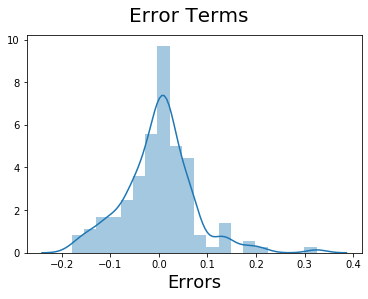

In [119]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Making Predictions
##### Before making any inference about the equation of the linear regression, let's test it on the test set

Applying the scaling on the test sets
Applying the transformation on the test set using the learning of the train set therefore we only transform.
we only use those variables which we used to train the final model. So lets use only those.

In [120]:
x = ['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower']
car_test[x] = scaler.transform(car_test[x])
car_test.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,gas,turbo,five,four,six,three,twelve,two,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,0.072382,0.313793,0.409756,0.341667,0.235066,0.139623,0.404762,0.091667,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
186,0.093295,0.368966,0.497561,0.433333,0.305275,0.181132,0.404762,0.154167,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
59,0.102964,0.420690,0.596748,0.516667,0.347944,0.230189,0.563492,0.150000,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
165,0.115479,0.272414,0.448780,0.308333,0.301396,0.139623,0.444444,0.266667,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
140,0.068652,0.231034,0.263415,0.291667,0.291699,0.177358,0.746032,0.104167,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [121]:
y_test = car_test.pop('price')
x_test = car_test

In [122]:
X_train_new.head()

,const,carwidth,enginesize,horsepower,four,hatchback,rwd,ohc,ohcf
122,1.0,0.291667,0.139623,0.083333,1,0,0,1,0
125,1.0,0.666667,0.339623,0.395833,1,1,1,1,0
166,1.0,0.308333,0.139623,0.266667,1,1,1,0,0
1,1.0,0.316667,0.260377,0.262500,1,0,1,0,0
199,1.0,0.575000,0.260377,0.475000,1,0,1,1,0


In [123]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = x_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [124]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

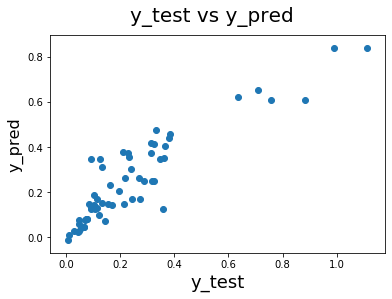

In [125]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### y_test VS y_pred is observed to be almost linear with some variataion occuring. Overall, it is a pretty linear spread.

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.0975751763992507
Model r2_score: 0.8218666141293461


In [127]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           2.35e-58
Time:                        22:27:36   Log-Likelihood:                 169.80
No. Observations:                 143   AIC:                            -321.6
Df Residuals:                     134   BIC:                            -294.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1010      0.037     -2.751      0.0

#####  Price (in Dollar) = -0.101 + 0.2704 * carwidth + 0.4539 * enginesize + 0.2534 * horsepower - 0.984 * four(cylindernumber) - 0.349 * hatchback + 0.114 * rwd + 0.0957 * ohc + 0.0925 * ohfc 